In [94]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [95]:

# Let's first load the data and take a look at what we have.
df = pd.read_csv('Heathrow_combined.csv')

In [96]:
df=df.dropna()

In [97]:
df

,Date,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,10/7/18,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,11/7/18,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,12/7/18,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,13/7/18,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,14/7/18,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...,...
772,6/1/21,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,7/1/21,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,9/1/21,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,16/1/21,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [98]:
df.drop(['Date'], 
               axis=1,
              inplace=True)


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
y = df['Nox_tropo']

In [101]:
X = df.drop(['Nox_tropo'], axis=1)

In [104]:
# split dataset to 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [106]:
from sklearn import svm

standard_scaler = StandardScaler()
#DataFlair
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
print('The first five rows after standardisation look like this:\n')



The first five rows after standardisation look like this:



In [107]:
from sklearn.svm import SVR

In [108]:
#DataFlair
SVM = SVR(kernel='rbf', gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(SVM.score(X_train_standard, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(X_test_standard, y_test)))

Accuracy of our SVM model on the training data is 0.11 out of 1
Accuracy of our SVM model on the test data is 0.03 out of 1


In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
import math
from math import sqrt

In [111]:
clf = SVR()
clf.fit(X_train, y_train)

y_pred = clf.predict( X_test)

In [112]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 91.501


In [117]:
MAE = mean_absolute_error(y_test ,y_pred)

In [118]:
MAE

61.21136658258776

SVR MAE : 61.21136658258776
    RMSE: Test RMSE: 91.501

In [120]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [121]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor()

In [122]:

# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.2600315750179685

In [123]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [124]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 76.84
Mean absolute error: 51.59
R-squared: 0.26


In [125]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [127]:
mean_absolute_percentage_error(y_test, nnr_pred)

52.09800106392567

In [128]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [129]:


lasso.fit(X_train, y_train)

Lasso()

In [130]:

# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.23444692080146678

In [131]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [135]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lasso_pred))



Root mean squared error: 78.15
Mean absolute error: 52.64


In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [137]:

# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1234)

In [138]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.23527210946963584

In [139]:

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [141]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 78.11
Mean absolute error: 53.41
R-squared: 0.24


In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [143]:

# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=200)

In [144]:

# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.2426883932895879

In [146]:

# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [147]:
# # The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 77.73
Mean absolute error: 51.20
R-squared: 0.24


In [148]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# LSTM

In [150]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [151]:

 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [152]:
df

,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...
772,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [153]:
dataset = df
values = dataset.values

In [154]:
dataset.values

array([[2.32124000e+02, 5.97469878e+01, 1.87000000e+01, ...,
        7.50000000e+01, 1.25000000e+01, 1.02390000e+03],
       [1.68044500e+02, 7.38705230e+01, 1.86000000e+01, ...,
        4.50000000e+01, 1.01000000e+01, 1.02180000e+03],
       [1.94003000e+02, 5.93940048e+01, 1.92000000e+01, ...,
        5.20000000e+01, 8.40000000e+00, 1.02150000e+03],
       ...,
       [2.82058500e+02, 5.88182587e+01, 1.00000000e-01, ...,
        1.78000000e+02, 6.60000000e+00, 1.02640000e+03],
       [1.47202000e+02, 3.74967921e+01, 4.80000000e+00, ...,
        2.14000000e+02, 1.48000000e+01, 1.02000000e+03],
       [7.46270000e+01, 3.76059383e+01, 5.30000000e+00, ...,
        2.69000000e+02, 1.28000000e+01, 1.02360000e+03]])

In [155]:
df

,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...
772,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [156]:
values[2]

array([ 194.003     ,   59.39400478,   19.2       ,   13.7       ,
         24.4       ,    0.        ,   52.        ,    8.4       ,
       1021.5       ])

In [157]:
encoder = LabelEncoder()

# ensure all data is float
values[:,4] = encoder.fit_transform(values[:,4])
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,]], axis=1, inplace=True)
# print(reframed.head())

In [158]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t)
1,0.435560,0.143119,0.657439,0.821429,0.734513,0.000000,0.182663,0.252101,0.660969,0.347648
2,0.347648,0.181692,0.653979,0.757937,0.765487,0.000000,0.089783,0.184874,0.631054,0.383261
3,0.383261,0.142155,0.674740,0.750000,0.809735,0.000000,0.111455,0.137255,0.626781,0.588048
4,0.588048,0.166184,0.723183,0.829365,0.889381,0.000000,0.368421,0.184874,0.631054,0.377984
5,0.377984,0.194734,0.764706,0.797619,0.915929,0.000000,0.498452,0.187675,0.605413,0.486563
...,...,...,...,...,...,...,...,...,...,...
576,0.180355,0.048106,0.121107,0.281746,0.035398,0.000000,0.000000,0.358543,0.606838,0.234052
577,0.234052,0.091874,0.121107,0.210317,0.066372,0.014706,0.226006,0.218487,0.598291,0.342017
578,0.342017,0.081541,0.006920,0.138889,0.000000,0.000000,0.808050,0.198880,0.585470,0.504066
579,0.504066,0.140583,0.013841,0.123016,0.013274,0.000000,0.501548,0.086835,0.696581,0.319053


In [164]:
reframed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t)
1,0.435560,0.143119,0.657439,0.821429,0.734513,0.0,0.182663,0.252101,0.660969,0.347648
2,0.347648,0.181692,0.653979,0.757937,0.765487,0.0,0.089783,0.184874,0.631054,0.383261
3,0.383261,0.142155,0.674740,0.750000,0.809735,0.0,0.111455,0.137255,0.626781,0.588048
4,0.588048,0.166184,0.723183,0.829365,0.889381,0.0,0.368421,0.184874,0.631054,0.377984
5,0.377984,0.194734,0.764706,0.797619,0.915929,0.0,0.498452,0.187675,0.605413,0.486563


In [165]:

# split into train and test sets
values = reframed.values

#70% training data
n_train_hours = 406
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(406, 1, 9) (406,) (174, 1, 9) (174,)


Train on 406 samples, validate on 174 samples
Epoch 1/50
 - 1s - loss: 0.3304 - val_loss: 0.2287
Epoch 2/50
 - 0s - loss: 0.2600 - val_loss: 0.1647
Epoch 3/50
 - 0s - loss: 0.1884 - val_loss: 0.1009
Epoch 4/50
 - 0s - loss: 0.1236 - val_loss: 0.0681
Epoch 5/50
 - 0s - loss: 0.0983 - val_loss: 0.0740
Epoch 6/50
 - 0s - loss: 0.0995 - val_loss: 0.0816
Epoch 7/50
 - 0s - loss: 0.1002 - val_loss: 0.0791
Epoch 8/50
 - 0s - loss: 0.0962 - val_loss: 0.0724
Epoch 9/50
 - 0s - loss: 0.0923 - val_loss: 0.0673
Epoch 10/50
 - 0s - loss: 0.0911 - val_loss: 0.0650
Epoch 11/50
 - 0s - loss: 0.0906 - val_loss: 0.0642
Epoch 12/50
 - 0s - loss: 0.0898 - val_loss: 0.0644
Epoch 13/50
 - 0s - loss: 0.0888 - val_loss: 0.0650
Epoch 14/50
 - 0s - loss: 0.0878 - val_loss: 0.0656
Epoch 15/50
 - 0s - loss: 0.0871 - val_loss: 0.0655
Epoch 16/50
 - 0s - loss: 0.0864 - val_loss: 0.0646
Epoch 17/50
 - 0s - loss: 0.0856 - val_loss: 0.0639
Epoch 18/50
 - 0s - loss: 0.0850 - val_loss: 0.0636
Epoch 19/50
 - 0s - loss: 0

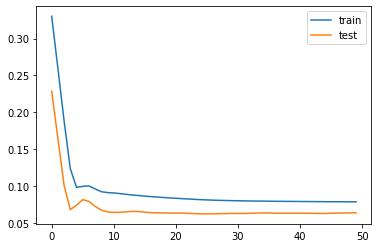

In [166]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [167]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

print("Mean absolute error: %.2f"
      % mean_absolute_error(inv_y,inv_yhat))

Test RMSE: 61.970
Mean absolute error: 46.44
